In [0]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Import DataSet de filmes do MovieLens
filmes = pd.read_csv('https://gist.githubusercontent.com/littlebru/f0c432ea5204715b37b85561e9afaeae/raw/b6dc7dc345320e53648ee71f3a9fee51fc1734fe/movie_metadata.csv')

In [0]:
# Lendo as primeiras 5 linhas da tabela
filmes.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0.0


In [0]:
# Descobrindo o formato da tabela (linhas/colunas)
filmes.shape

(3051, 28)

In [0]:
# Descobrindo os tipos de dados existentes na tabela
filmes.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes         int64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [0]:
# Listando as colunas do dataFrame
list(filmes.columns)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [0]:
# Removendo colunas que não serão utilizadas para a análise
# Definindo que quero remover as linhas do eixo 1 (axis = 1, inplace=True)

filmes.drop('movie_imdb_link', axis= 1, inplace=True)

In [0]:
# Descobrindo quantos tipos existem na coluna cor e quais são eles
filmes['color'].value_counts()

Color               2960
 Black and White      84
Name: color, dtype: int64

In [0]:
# Removendo coluna 'color'
filmes.drop('color', axis=1, inplace=True)

In [0]:
# Verificando se existem valores faltantes na tabela 
# (porque isso pode acarretar em problemas em análises futuras)
filmes.isna().any()

director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes       False
gross                         True
genres                       False
actor_1_name                 False
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                    True
aspect_ratio                  True
movie_facebook_likes          True
dtype: bool

In [0]:
# Verificando em quantos casos tem valores faltantes (somando quantos são vazios)
filmes.isna().sum()

director_name                 57
num_critic_for_reviews        11
duration                       4
director_facebook_likes       57
actor_3_facebook_likes         5
actor_2_name                   3
actor_1_facebook_likes         0
gross                        217
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   5
facenumber_in_poster           4
plot_keywords                 32
num_user_for_reviews           9
language                       4
country                        4
content_rating                61
budget                       170
title_year                    62
actor_2_facebook_likes         4
imdb_score                     1
aspect_ratio                  56
movie_facebook_likes           1
dtype: int64

In [0]:
# Removendo colunas que tem um numero menor de dados presentes
filmes.dropna(axis=0, subset=['director_name', 'director_facebook_likes',
                               'actor_1_facebook_likes', 'actor_2_facebook_likes',
                               'actor_3_facebook_likes', 'movie_facebook_likes', 'facenumber_in_poster',
                               'actor_3_name','actor_2_name'], inplace=True)


In [0]:
# Verificando os dados existentes na tabela
# Após a exclusão das colunas
filmes.shape

(2986, 26)

In [0]:
# Verificando a classificação indicativa dos filmes e quantas existem na tabela
filmes['content_rating'].value_counts()

R            1154
PG-13        1148
PG            530
G              84
Not Rated      14
Unrated         8
Approved        5
TV-14           2
X               1
NC-17           1
GP              1
Name: content_rating, dtype: int64

In [0]:
# Renomeando linhas vazias por 'Sem Classificação'
filmes['content_rating'].fillna('Sem Classificação', inplace=True)

In [0]:
# Descobrindo os valores de tamanho da tela dos filmes
filmes['aspect_ratio'].value_counts()

2.35    1759
1.85    1087
1.37      21
1.78      21
1.66      17
1.33      12
2.20       9
2.39       9
2.00       3
2.76       2
2.40       2
2.24       1
1.18       1
1.77       1
1.50       1
Name: aspect_ratio, dtype: int64

In [0]:
# Utilizando a mediana da quantidade de tamanho de telas em valores vazios
filmes['aspect_ratio'].fillna(filmes['aspect_ratio'].median(), inplace=True)

In [0]:
# Utilizando a mediana para substituir valores vazios do orçamento do filme
filmes['budget'].fillna(filmes['budget'].median(), inplace=True)

In [0]:
# Utilizando a mediana para substituir valores vazios do faturamento do filme
filmes['gross'].fillna(filmes['gross'].median(), inplace=True)

------

# Desafio 01
Teste nessas duas ultimas colunas acima (Faturamento e Orçamento), trocar os valores vazios pela média ao invés da mediana

In [0]:
# Utilizando a media para substituir valores vazios do orçamento do filme
filmes['budget'].fillna(filmes['budget'].mean(), inplace=True)

In [0]:
# Utilizando a mediana para substituir valores vazios do faturamento do filme
filmes['gross'].fillna(filmes['gross'].mean(), inplace=True)

------

In [0]:
# Substituindo linhas vazias pela mediana de numero de usuarios por revisão
filmes['num_user_for_reviews'].fillna(filmes['num_user_for_reviews'].median(), inplace=True)

In [0]:
# Substituindo valores vazios da coluna de criticas, pela mediana
filmes['num_critic_for_reviews'].fillna(filmes['num_critic_for_reviews'].median(), inplace=True)

In [0]:
# Substituindo valores vazios pelo texto 'vazio' na coluna de palavras chaves
filmes['plot_keywords'].fillna('vazio', inplace=True)

In [0]:
# Descobrindo valores da coluna de 'ano de publicação?' de cada filme (pegando os 15 primeiros)
filmes['title_year'].value_counts().head(15)

2009.0    157
2008.0    156
2006.0    149
2004.0    142
2002.0    139
2005.0    139
2010.0    139
2001.0    135
2011.0    135
2013.0    133
2014.0    132
2012.0    129
2007.0    128
2015.0    122
2000.0    118
Name: title_year, dtype: int64

In [0]:
# Substituindo valores vazios por '--' na coluna de 'ano_de_divulgação?'
filmes['title_year'].fillna('--', inplace=True)

In [0]:
# Substituindo valores vazios da coluna 'duration' pela mediana de tempo dos filmes
filmes['duration'].fillna(filmes['duration'].median(), inplace=True)

In [0]:
filmes.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [0]:
# Verificando se existem dados duplicados e quantos são
filmes.duplicated().sum()

24

In [0]:
# Removendo os 24 dados duplicados da tabela
filmes.drop_duplicates(inplace=True)

In [0]:
# Verificando a quantidade de dados no DataFrame
filmes.shape

(2962, 26)

In [0]:
# Verificando dados na coluna linguas
filmes['language'].value_counts()

English       2854
French          27
Mandarin        21
Japanese        10
Spanish          8
German           6
Russian          6
Cantonese        5
Korean           3
Italian          2
Swedish          2
Chinese          2
Dari             1
Telugu           1
Thai             1
Dutch            1
Maya             1
Portuguese       1
Hebrew           1
Filipino         1
Mongolian        1
Bosnian          1
Aboriginal       1
Hindi            1
None             1
Aramaic          1
Hungarian        1
Kazakh           1
Name: language, dtype: int64

In [0]:
# Removendo coluna linguagem pois os dados não são muito relevantes
filmes.drop('language', axis=1, inplace=True)

In [0]:
# Verificando dados na coluna países
filmes['country'].value_counts()

USA               2356
UK                 228
France              94
Germany             66
Canada              46
Australia           28
China               23
Spain               15
Japan               15
Hong Kong           10
Italy                8
South Korea          8
Russia               7
New Zealand          6
Ireland              5
South Africa         5
Belgium              4
India                3
Mexico               3
Denmark              3
Taiwan               2
West Germany         2
Netherlands          2
Czech Republic       2
Sweden               2
Hungary              2
Chile                1
Greece               1
Iran                 1
Slovakia             1
Soviet Union         1
Bulgaria             1
Switzerland          1
Cambodia             1
New Line             1
Peru                 1
Georgia              1
Libya                1
Aruba                1
Romania              1
Thailand             1
Official site        1
Panama               1
Name: count

In [0]:
# Removendo coluna Países pois os dados são irrelevantes
filmes.drop('country', axis=1, inplace=True)

In [0]:
# Adicionando a coluna Lucro na tabela 'Profit'
filmes['Profit'] = filmes['budget'].sub(filmes['gross'], axis=0)

In [0]:
filmes.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,PG-13,237000000.0,2009,936.0,7.9,1.78,33000.0,-523505847.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,PG-13,300000000.0,2007,5000.0,7.1,2.35,0.0,-9404152.0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,PG-13,245000000.0,2015,393.0,6.8,2.35,85000.0,44925825.0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,PG-13,250000000.0,2012,23000.0,8.5,2.35,164000.0,-198130642.0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,738.0,PG-13,263700000.0,2012,632.0,6.6,2.35,24000.0,190641321.0


In [0]:
# Adicionando coluna de Percentual de Lucro
filmes['Profit_Percentage'] = (filmes['Profit']/filmes['gross'])*100

In [0]:
filmes.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,PG-13,237000000.0,2009,936.0,7.9,1.78,33000.0,-523505847.0,-68.836532
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,PG-13,300000000.0,2007,5000.0,7.1,2.35,0.0,-9404152.0,-3.039439
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,PG-13,245000000.0,2015,393.0,6.8,2.35,85000.0,44925825.0,22.454585
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,PG-13,250000000.0,2012,23000.0,8.5,2.35,164000.0,-198130642.0,-44.212697
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,738.0,PG-13,263700000.0,2012,632.0,6.6,2.35,24000.0,190641321.0,260.942743


In [0]:
# Criando um novo arquivo CSV para o dataFrame Manipulado :D !!
filmes.to_csv('dados_imdl_analise_expl.csv', index=False)

# Visualização dos Dados com Gráfico :D

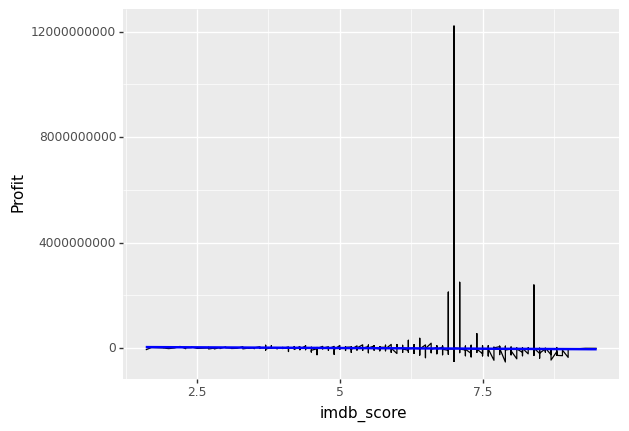

<ggplot: (8782530582946)>

In [0]:
ggplot(aes(x='imdb_score', y='Profit'), data=filmes) +\
geom_line() +\
stat_smooth(color='blue', span=1)

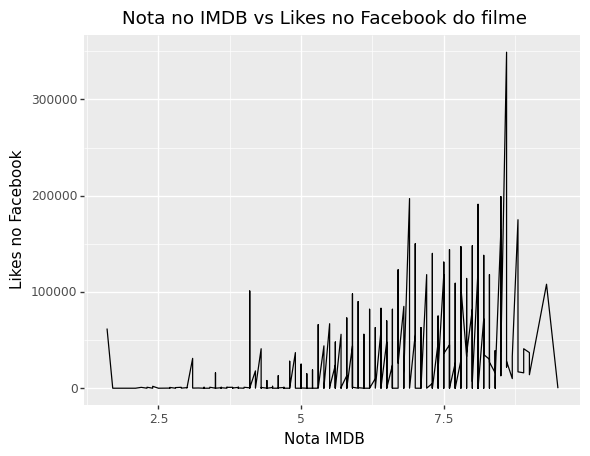

<ggplot: (8782530534173)>

In [0]:
ggplot(filmes) +\
       aes(x='imdb_score', y='movie_facebook_likes') +\
       geom_line() +\
       labs(title='Nota no IMDB vs Likes no Facebook do filme', x='Nota IMDB', y='Likes no Facebook')

# Curiosidade adicional
Gerando um gráfico correlacionando a nota dos filmes no IMDB com o nome dos atores principais dos 20 primeiros filmes

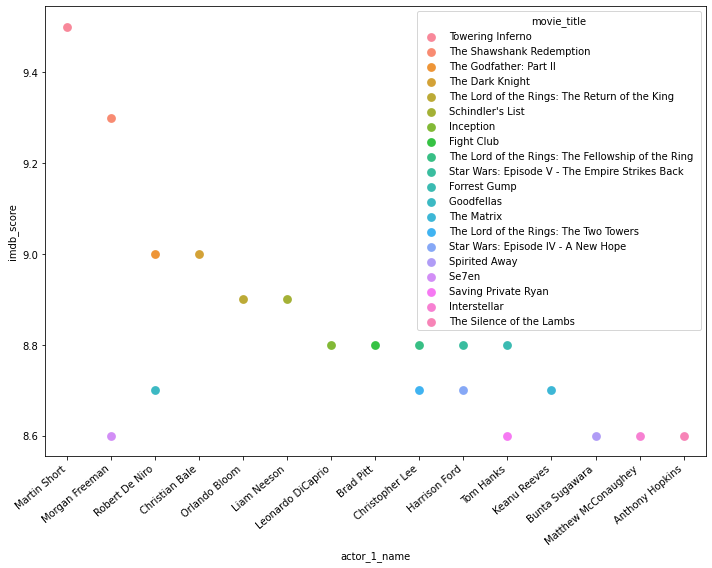

In [0]:
plt.figure(figsize=(10,8))

filmes = filmes.sort_values(by='imdb_score', ascending=False)
notas_vs_atores_principais = filmes.head(20)  # Pegando os 20 primeiros filmes
ax = sns.pointplot(notas_vs_atores_principais['actor_1_name'], notas_vs_atores_principais['imdb_score'],
                   hue=notas_vs_atores_principais['movie_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.tight_layout()
plt.show()

----

# Chega de gráfico por hora vamos continuar a limpeza dos dados


In [0]:
# Removendo colunas que futuramente não serão utilizadas (nome_diretor, nome_atores, nome_filme, palavras_chave)
filmes.drop(columns=['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name',
                     'plot_keywords', 'movie_title'], axis=1, inplace=True)

In [0]:
# Verificando a distribuição de valores na coluna de generos
filmes['genres'].value_counts()

Comedy                                                   107
Comedy|Romance                                           106
Comedy|Drama|Romance                                      96
Drama                                                     73
Drama|Romance                                             73
                                                        ... 
Crime|Drama|Sport                                          1
Adventure|Crime|Drama|Mystery|Thriller                     1
Action|Adventure|Drama|Romance|Thriller                    1
Action|Adventure|Comedy|Family|Fantasy|Mystery|Sci-Fi      1
Action|Adventure|Drama|Romance|Western                     1
Name: genres, Length: 695, dtype: int64

In [0]:
# Removendo coluna de gêneros da tabela
filmes.drop('genres', axis=1, inplace=True)

In [0]:
# Removendo colunas criadas Profit (lucro) e Profit_Percentage (Porcentagem de lucro)
filmes.drop(columns=['Profit', 'Profit_Percentage'], axis=1, inplace=True)

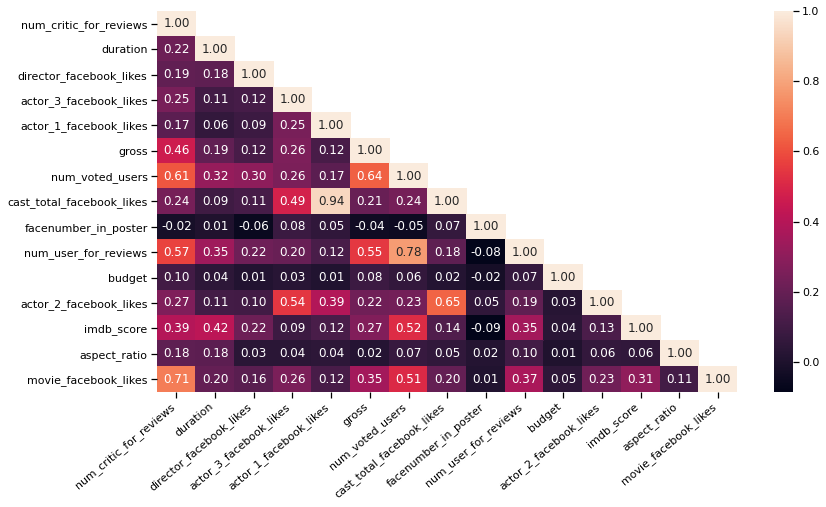

In [0]:
# Importando biblioteca
import numpy as np

# Vamos verificar como as colunas restantes estão correlacionadas usando um mapa de calor com "corr" do pandas
corr = filmes.corr()
sns.set_context("notebook", font_scale=1.0, rc={'lines.linewidth':2.5})
plt.figure(figsize=(13,7))

# Criando uma mascara, nos permitindo ver apenas a correlação dos valores
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f')

# Rotacionando legendas inferiores
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=40, ha='right')


In [0]:
# Substituindo as variaveis dos atores por uma só de likes dos atores
filmes['Others_actors_facebook_likes']=filmes['actor_2_facebook_likes'] + filmes['actor_3_facebook_likes']

In [0]:
# Removendo o numero de likes do ator 2 e 3 e o numero de likes do facebook
filmes.drop(columns=['actor_2_facebook_likes', 'actor_3_facebook_likes',
                     'cast_total_facebook_likes'], axis=1, inplace=True)

In [0]:
# Criando uma nova coluna que é uma razão entre o numero de review e o numero de usuarios por review
filmes['critic_review_ratio'] = filmes['num_critic_for_reviews']/filmes['num_user_for_reviews']

In [0]:
# Removendo variaveis do numero de usuarios por review e o numero de reviews
filmes.drop(columns=['num_user_for_reviews', 'num_critic_for_reviews'], axis=1, inplace=True)

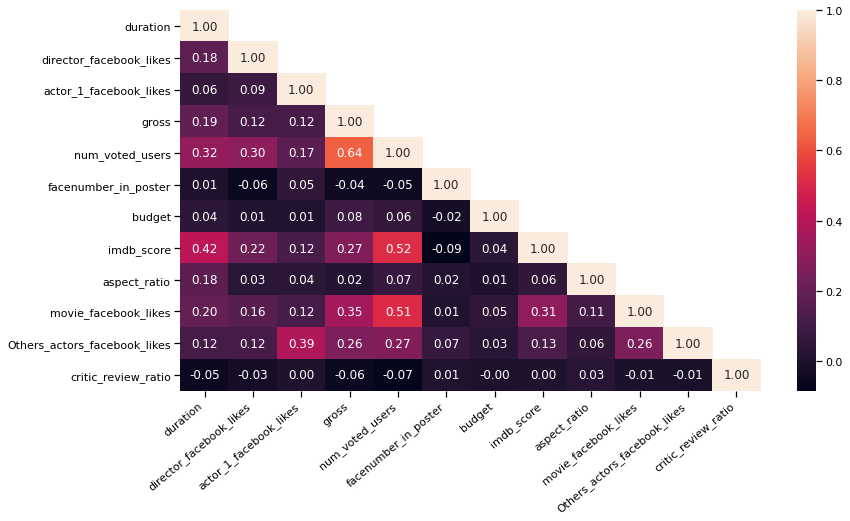

In [0]:
# Vamos verificar novamente se ainda existem a correlação dos dados que sobraram

corr = filmes.corr()
sns.set_context("notebook", font_scale=1.0, rc={'lines.linewidth':2.5})
plt.figure(figsize=(13,7))

# Criando uma mascara, nos permitindo ver apenas a correlação dos valores
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f')

# Rotacionando legendas inferiores
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=40, ha='right')

Os dados estão bem abaixo de 0.65 então podemos continuar

In [0]:
# Transformando em categorias as notas do filme (ruim, medio, bom, excelente)-> (1,2,3,4)
filmes['imdb_binned_score']= pd.cut(filmes['imdb_score'], bins=[0,4,6,8,10], right=True, labels=False)+1

In [0]:
# Visualizando como ficou a coluna de notas categorizadas criada (imdb_binned_score)
filmes.head()

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,Others_actors_facebook_likes,critic_review_ratio,imdb_binned_score
2765,65.0,0.0,770,39608295.5,10,2.0,Sem Classificação,35000000.0,--,9.5,1.33,0.0,355.0,0.654462,4
1937,142.0,0.0,11000,28341469.0,1689764,0.0,R,25000000.0,1994,9.3,1.85,108000.0,1206.0,0.048021,4
2837,220.0,0.0,22000,57300000.0,790926,1.0,R,13000000.0,1974,9.0,1.85,14000.0,17000.0,0.229231,4
66,152.0,22000.0,23000,533316061.0,1676169,0.0,PG-13,185000000.0,2008,9.0,2.35,37000.0,24000.0,0.138204,4
339,192.0,0.0,5000,377019252.0,1215718,2.0,PG-13,94000000.0,2003,8.9,2.35,16000.0,1273.0,0.102854,4


In [0]:
# Convertendo a categoria do filme (que esta de forma textual) para forma numerica
filmes = pd.get_dummies(data = filmes, columns=['content_rating'], prefix=['content_rating'], drop_first=True)

In [0]:
# Visualizando como ficou a coluna de categorização de classificação indicativa
filmes.head()

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,Others_actors_facebook_likes,critic_review_ratio,imdb_binned_score,content_rating_G,content_rating_GP,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_Sem Classificação,content_rating_TV-14,content_rating_Unrated,content_rating_X
2765,65.0,0.0,770,39608295.5,10,2.0,35000000.0,--,9.5,1.33,0.0,355.0,0.654462,4,0,0,0,0,0,0,0,1,0,0,0
1937,142.0,0.0,11000,28341469.0,1689764,0.0,25000000.0,1994,9.3,1.85,108000.0,1206.0,0.048021,4,0,0,0,0,0,0,1,0,0,0,0
2837,220.0,0.0,22000,57300000.0,790926,1.0,13000000.0,1974,9.0,1.85,14000.0,17000.0,0.229231,4,0,0,0,0,0,0,1,0,0,0,0
66,152.0,22000.0,23000,533316061.0,1676169,0.0,185000000.0,2008,9.0,2.35,37000.0,24000.0,0.138204,4,0,0,0,0,0,1,0,0,0,0,0
339,192.0,0.0,5000,377019252.0,1215718,2.0,94000000.0,2003,8.9,2.35,16000.0,1273.0,0.102854,4,0,0,0,0,0,1,0,0,0,0,0


Ele criou uma coluna pra cada classificação indicativa :o

In [0]:
# Vamos salvar os dados gerados, para ter um backup das analises feitas
filmes.to_csv('dados_imdb_com_nota.csv', index=False)

----

# Vamos definir as colunas para fazer uma previsão dos dados da pontuação dos filmes no IMDB

Vamos primeiro ter que reescrever o nosso dataframe inteiro para que o programa possa fazer sozinho uma previsão de dados

In [0]:
# Vamos escrever todas as colunas do dataframe que queremos prever
X = pd.DataFrame(columns=['duration', 'director_facebook_likes', 'actor_1_facebook_likes',
                          'gross', 'num_voted_users', 'facenumber_in_poster', 'budget',
                          'aspect_ratio','movie_facebook_likes','Others_actors_facebook_likes',
                          'critic_review_ratio', 'content_rating_G','content_rating_GP',
                          'content_rating_Sem Classificação', 'content_rating_NC-17','content_rating_Not Rated',
                          'content_rating_PG','content_rating_PG-13','content_rating_R',
                          'content_rating_TV-14','content_rating_Unrated','content_rating_X'], data=filmes)

O programa vai passar por um aprendizado SUPERVISIONADO, ou seja, ele vai depender de um dataset para prever os valores, e vai aprendendo sozinho com um "tutor"(dados do dataset) para ir corringindo os erros feitos pelo programa

In [0]:
# Definindo os dados que o programa vai aprender para se auto corrigir
y = pd.DataFrame(columns=['imdb_binned_score'], data=filmes)

Treinamento , Teste e Validação, vamos treinar com um conjunto de dados e escolher o melhor modelo para realizar o calculo de como foi a performance final do modelo

In [0]:
# Vamos utilizar o modelo Treino e Teste com sklearn
from sklearn.model_selection import train_test_split

In [0]:
# Definido os dados para treinamento e teste (neste caso vamos separar 70% para treinamento e 30% para o teste)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Precisamos normalizar os dados, pois os valores são muito diferentes entre si, e isso pode atrapalhar o modelo a se reajustar quando ele realiza um erro de previsão

Isso deve ser feito para os dados de treinamento e de teste, pois isso pode atrapalhar a auto-correção do modelo

Levando mais tempo para chegar a uma resposta correta

In [0]:
# Normalizando os dados
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler() #Inicializando o construtor e aplcando o normalizador

# aplicando o construtor no conjunto de treinamento
X_train = sc_X.fit_transform(X_train) # Realizando o calculo de quais modificaçõs devem ser feitas
X_test = sc_X.transform(X_test) # Aplicando as transformações no conjunto de testes

O programa gerou um aviso falando que houve uma divisãi invalida.

Provavelmente existe algum valor faltante no DataFrame, vamos verificar

In [0]:
X.isna().sum()

duration                            0
director_facebook_likes             0
actor_1_facebook_likes              0
gross                               0
num_voted_users                     0
facenumber_in_poster                0
budget                              0
aspect_ratio                        0
movie_facebook_likes                0
Others_actors_facebook_likes        0
critic_review_ratio                 0
content_rating_G                    0
content_rating_GP                   0
content_rating_Sem Classificação    0
content_rating_NC-17                0
content_rating_Not Rated            0
content_rating_PG                   0
content_rating_PG-13                0
content_rating_R                    0
content_rating_TV-14                0
content_rating_Unrated              0
content_rating_X                    0
dtype: int64

Os valores faltantes eram erros de digitação nos nomes das colunas, só precisamos corrigir ;D

Vamos utilizar um modelo de **Regressão Logistica**: Ele tenta descobrir um função matematica que simule a distribuição dos dados que temos.

Deixo o programa ter uma consulta dos dados para poder ir treinando até chegar ao resultado correto

Seleciona os dados escolhidos e ajusta dentro da regressão

predict retorna os valores previstos pelo programa

 Verbose nos permite ver o que o programa esta fazendo no treinamento

 Definindo o modelo de regressao logistica

In [0]:
# Importando biblioteca para o uso deste modelo
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(verbose=1, max_iter=1000)
logit.fit(X_train, np.ravel(Y_train, order='C'))
Y_pred = logit.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [0]:
# Valores preditos pelo programa
Y_pred

array([3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 4, 3, 2, 3,
       3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 2, 2, 3, 2, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       3, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 2, 4, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 4, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3,
       2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 4, 2, 3, 3, 3,
       2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3,
       2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2,

In [0]:
# Vamos calcular as metricas e visualizar se a previsão do programa esta correta
# Vamos calcular a matriz de confusão

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

In [0]:
# Vamos imprimir esta matriz de um jeitinho mais bonito

# Função: Gera a matriz confusão em um gráfico
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title="Matriz de Confusão",
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[: ,np.newaxis]

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
    horizontalalignment="center",
    color='white' if cm[i, j] > thresh else 'black')

  plt.ylabel('True label')
  plt.xlabel('Predcted label')
  plt.tight_layout()


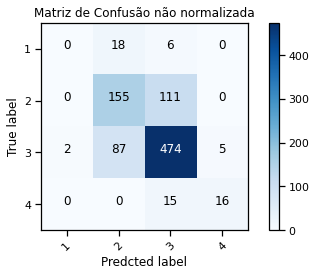

In [0]:
# Chamando a função de plotagem da matriz confusão passando parametros definidos anteriormente
plot_confusion_matrix(cnf_matrix, classes=['1', '2', '3', '4'], title='Matriz de Confusão não normalizada', normalize=False)

O programa tem mais facilidade de prever os filmes melhor classificados:
pode ser porque a quantidade de valores nesta coluna é maior, logo ele tem mais valores para aprender e os erros das outras classes acabam não importando tanto

In [0]:
# Vamos verificar se esse dados são verdadeiros
filmes['imdb_binned_score'].value_counts()


3    1870
2     896
4     118
1      78
Name: imdb_binned_score, dtype: int64

In [0]:
# Vamos calculas valores além da matriz confusão
print(metrics.classification_report(Y_test, Y_pred, target_names=['1', '2', '3' ,'4']))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        24
           2       0.60      0.58      0.59       266
           3       0.78      0.83      0.81       568
           4       0.76      0.52      0.62        31

    accuracy                           0.73       889
   macro avg       0.54      0.48      0.50       889
weighted avg       0.70      0.73      0.71       889



support mostra o numero de amostras:

### indice
1- filmes ruins <br>
2- filmes medios<br>
3 - filmes bons<br>
4- filmes excelentes<br>

------

A classe com mais amostras é a classe dos filmes bons, refletindo na previsão feita pelo programa na matriz de confusão

In [0]:
# vamos salvar o modelo treinado com machine learning

import pickle

In [0]:
modelo_treinado = 'modelo_imdb.sav'

In [0]:
pickle.dump(logit, open(modelo_treinado, 'wb'))

In [0]:
# Como saber se este modelo é o modelo treinado?

In [0]:
modelo_carregado = pickle.load(open(modelo_treinado, 'rb'))

In [0]:
# Podemos fazer inferencias no modelo com informações novas ou não (mostrar ao modelo novos dados)
#Primeiro conjunto de dados do primeiro x teste
X_test[0]

array([-0.15104959, -0.04429111, -0.43716117, -0.02203083, -0.22332328,
       -0.19587641, -0.08806482,  0.77980286, -0.41974137, -0.35682072,
       -0.156889  , -0.17412091, -0.02196874, -0.12321199, -0.02196874,
       -0.05820816, -0.4607393 , -0.78871143,  1.25888364,  0.        ,
       -0.0622422 , -0.02196874])

In [0]:
# Vamos fazer um predict em cima da variavel x_test

modelo_carregado.predict([X_test[0]])

array([3])

Os filmes desse valores são do tipo 3 (bons)